In [1]:
# This tutorial is based on Andrey Karparthy's NN tutorial.
# https://karpathy.github.io/neuralnets/
# He puts forward the idea that real values flow forward through simple systems
# Whilst gradients flow backward through them
# This is useful for understanding Back Propagation.
# Let's take a look.

def forwardMultiplyGate(x, y):
    return x * y

print (forwardMultiplyGate(-2, 3)); # returns -6. Exciting.

print ("we want to get a number bigger than -6 without changing the inputs ourselves")

-6
we want to get a number bigger than -6 without changing the inputs ourselves


In [2]:
# Random Local Search
# -----------------
# In Neural Nets, we tweak the input values
# until we get closer to the result we are looking for
# We can use a random local search to do this
# we could do this randomly by changing x,y randomly small amounts and keep track of what works best

# but it's a rubbish idea.

import math
import random

x = -2
y = 3;

def forwardMultiplyGate(x, y):
    return x * y

tweak_amount = 0.01 # this is a bit like the learning rate
best_out = -10000000
best_x = x
best_y = y

for k in range(100): # 100 is the number of steps
    x_try = x + tweak_amount * (random.random() * 2 - 1) # tweak x a bit
    y_try = y + tweak_amount * (random.random() * 2 - 1) # tweak y a bit
    out = forwardMultiplyGate(x_try, y_try)
    if out > best_out:
        # best improvement yet! Keep track of the x and y
        best_out = out
        best_x = x_try
        best_y = y_try
        print (best_out)
        
print ("This works, but is not very efficient.")

-5.965773202730492
-5.9587171390047695
-5.954707429873119
This works, but is not very efficient.


In [3]:
# Numerical Gradient
# ------------------
# "The derivative can be thought of as a force on each input
# as we pull on the output to become higher."
# ------------------

# Instead of doing a random search,
# we're going to increase the inputs very slightly
# and check what happens to the output to see if it's what we expect
# The amount of change in the output is the DERIVATIVE 

# Below, we add h - the tweak amount to x and y, 
# Then we check check the difference between the output
# And the first output - this difference is the derivative.

def forwardMultiplyGate(x, y):
    return x * y

x = -2
y = 3
out = forwardMultiplyGate(x, y) # -6
h = 0.0001; # This is the tweak amount. Some say it should be
# as small as possible but this is small enough

# compute derivative with respect to x
xph = x + h # -1.9999
out2 = forwardMultiplyGate(xph, y) # -5.9997
x_derivative = (out2 - out) / h; # 3.0 - we divide by h to normalise

# compute derivative with respect to y
yph = y + h # 3.0001
out3 = forwardMultiplyGate(x, yph) # -6.0002
y_derivative = (out3 - out) / h # -2.0 - we divide by h to normalise

print ("x_derivative =", x_derivative)
print ("y_derivative =", y_derivative)

# When we talk about all the inputs together with respect to output, 
# We're actually talking about the GRADIENT
# not the indiviual derivatives

gradient = [x_derivative,y_derivative]

print ("The Gradient is", gradient)

# move towards the gradient by scaling it a little
# then moving towards it a bit
# this is the same as chasing an object

step_size = 0.01; # If this was big, it would work, 
# BUT it might not work with more complex networks
x = x + (step_size * x_derivative); # x becomes -1.97
y = y + (step_size * y_derivative); # y becomes 2.98
out_new = forwardMultiplyGate(x, y) # -5.87.
print ("The New Output is", out_new)

# The gradient is the direction of the steepest increase
# This means it's taking the inputs where they need to go
# To get the output closer to what we want
# This is exactly how we move towards objects in space

x_derivative = 3.00000000000189
y_derivative = -2.0000000000042206
The Gradient is [3.00000000000189, -2.0000000000042206]
The New Output is -5.87059999999986


In [4]:
# ANALYTIC GRADIENT
# -------------------

# The numerical gradient is actually rubbish
# If we have lots of inputs
# it is dumb to calculate the gradient
# by evaluating all the inputs separately all the time

# Instead we're going to use the "analytic gradient"
# The trick here is that derivative of X actually turned out to be Y
# So why bother to calculate it at all?
# Just use Y, and the whole thing gets much simpler to compute
# As long as we can calculate a base case first, we can use it
# Without having to do so over and over again.

x = -2
y = 3
out = forwardMultiplyGate(x, y)
x_gradient = y; # because it turns out the gradient of x is y.
y_gradient = x; # vice versa

step_size = 0.01;
x += step_size * x_gradient
y += step_size * y_gradient
out_new = forwardMultiplyGate(x, y)

print ("New Output =", out_new)
# In practice NN systems compute the numerical gradient and the analytical gradient

New Output = -5.8706


In [5]:
# In order to turn this simple system in to a complex one, 
# We just need lots of these together
# But we also have to connect them up.
# In order for this to work, we need to add something extra
# We need to *add as well as *multiply

# a and b are just local variables, not inputs to the neuron
def forwardMultiplyGate(a, b):
    return a * b

def forwardAddGate(a, b):
    return a + b

def forwardCircuit(x,y,z):
    q = forwardAddGate(x, y)
    f = forwardMultiplyGate(q, z)
    return f

x = -2
y = 5
z = -4
f = forwardCircuit(x, y, z); # output is -12

# Now we add things together, and then multiply
print (f)


-12


In [6]:
# BUT - how do we calculate the gradient now?
# EASY - we only do it for the inputs we are multiplying.
# So everything else stays the same
# It just allows us to chain Neurons together.
# The derivative of the addition part is always 1

# Let's set this up:
# initial conditions

def forwardMultiplyGate(a, b):
    return a * b

def forwardAddGate(a, b):
    return a + b

def forwardCircuit(x,y,z):
    q = forwardAddGate(x, y)
    f = forwardMultiplyGate(q, z)
    return f

x = -2
y = 5
z = -4
q = forwardAddGate(x, y) # q is 3
f = forwardMultiplyGate(q, z) # output is -12

print (f)

# gradient of the MULTIPLY gate with respect to its inputs
# wrt is short for "with respect to"
derivative_f_wrt_z = q # 3
derivative_f_wrt_q = z # -4

# derivative of the ADD gate with respect to its inputs
derivative_q_wrt_x = 1.0
derivative_q_wrt_y = 1.0

# chain rule
derivative_f_wrt_x = derivative_q_wrt_x * derivative_f_wrt_q # -4
derivative_f_wrt_y = derivative_q_wrt_y * derivative_f_wrt_q # -4

# final gradient, from above: [-4, -4, 3]
gradient_f_wrt_xyz = [derivative_f_wrt_x, derivative_f_wrt_y, derivative_f_wrt_z]

# let the inputs respond to the force/tug:
step_size = 0.01
x = x + step_size * derivative_f_wrt_x # -2.04
y = y + step_size * derivative_f_wrt_y # 4.96
z = z + step_size * derivative_f_wrt_z # -3.97

# Our circuit now better give higher output:
q = forwardAddGate(x, y) # q becomes 2.92
f = forwardMultiplyGate(q, z) # output is -11.59, up from -12! Nice!

print (f)

-12
-11.5924


In [7]:
# let's check the derivatives with a numerical gradient check
# initial conditions
x = -2
y = 5
z = -4

# numerical gradient check
h = 0.0001;
x_derivative = (forwardCircuit(x+h,y,z) - forwardCircuit(x,y,z)) / h # -4
y_derivative = (forwardCircuit(x,y+h,z) - forwardCircuit(x,y,z)) / h # -4
z_derivative = (forwardCircuit(x,y,z+h) - forwardCircuit(x,y,z)) / h # 3

print (x_derivative,y_derivative,z_derivative)


-3.9999999999906777 -3.9999999999906777 3.000000000010772


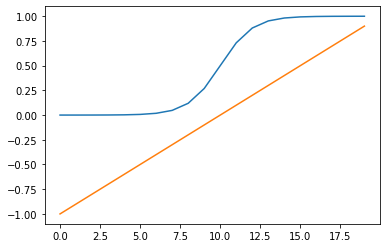

In [9]:
# INTERLUDE: 
# -----------
# Sigmoid Function - f = 1.0 / (1.0 + math.exp(-x))
# This function is often used as 
# an activation function in Neural Networks


import numpy as np
import matplotlib.pyplot as plt

input_sig = np.arange(-10,10)
output_sig = np.zeros((20))

for val in input_sig:
    output_sig[val+10] = 1.0 / (1 + math.exp(-val))


plt.plot(output_sig)
plt.plot(input_sig * 0.1) # scaling the input just so we can compare
plt.show()


In [10]:
# SVM with Stochastic Gradient Descent
import math
import random

data = []
labels = []
data.append([1.2, 0.7])
labels.append(1)
data.append([-0.3, -0.5])
labels.append(-1)
data.append([3.0, 0.1])
labels.append(1)
data.append([-0.1, -1.0])
labels.append(-1)
data.append([-1.0, 1.1])
labels.append(-1)
data.append([2.1, -3])
labels.append(1)

predicted_label = 0
num_correct = 0

a = 1
b = -2
c = -1 # initial parameters

for i in range(len(data)):
    x = data[i][0]
    y = data[i][1]
    true_label=labels[i]
    score = a*x + b*y + c
    if score > 0:
        predicted_label = 1
    if score < 0:
        predicted_label = -1
    if predicted_label == true_label:
        num_correct=num_correct+1

print (num_correct)

for iterator in range(400):
    # pick a random data point
    i = math.floor(random.random() * len(data))
    x = data[i][0]
    y = data[i][1]
    label = labels[i]
    #compute pull
    score = a*x + b*y + c
    pull = 0.0
    if label == 1 and score < 1:
        pull = 1
    if label == -1 and score > -1:
        pull = -1
    # compute gradient and update parameters
    step_size = 0.01
    a += step_size * (x * pull - a) # -a is from the regularization
    b += step_size * (y * pull - b) # -b is from the regularization
    c += step_size * (1 * pull)
    #print (score)

num_correct = 0    
    
for i in range(len(data)):
    x = data[i][0]
    y = data[i][1]
    true_label=labels[i]
    score = a*x + b*y + c
    if score > 0:
        predicted_label = 1
    if score < 0:
        predicted_label = -1
    if predicted_label == true_label:
        num_correct=num_correct+1

print (num_correct)

4
5
